# Popular Data Science Questions

The aim of this project is to help a company, that works in producing data science content on what best content to focus on.
The best content will be the one data science enthusiasts are more interested in learning.  
I am going to use __[Data Science Stack Exchange](https://datascience.stackexchange.com/)__ to determine what content should a data science education company create, based on interest by subject.

## Stack Exchange

#### What kind of questions are welcome on this site?

On DSSE's __[help](https://datascience.stackexchange.com/help)__ center's section on questions , we can read that we should:<br>  

* Ask questions that are practical, answerable, based on actual problems that one faces. 
* Questions should be reasonably scoped.<br> 
* Avoid subjective questions.<br> 

#### What, other than questions, does the site's home subdivide into?    

On the __[home page](https://datascience.stackexchange.com/)__ we can see that we have four sections:
    
   

  * __[Questions](https://datascience.stackexchange.com/questions)__ - A list of all questions asked;
  * __[Tags](https://datascience.stackexchange.com/tags)__ - A list of keywords that categorize questions;
  * __[Users](https://datascience.stackexchange.com/users)__ - A list of users;
  * __[Unanswered](https://datascience.stackexchange.com/unanswered)__ - A list of questions with no upvoted or accepted answers;


The tagging system used by Stack exchange will help us solve our problem, as it enablesus quantify how many questions are asked about each subject. <br> Since Stack Exchange's sites are heavily moderated by the community; this gives us some confidence in using the tagging system to derive conclusions.

#### What information is available in each post?   

Looking, just as an example, at __[this](https://datascience.stackexchange.com/questions/81656/question-about-alphago-zeros-neural-network-architecture)__ question, some of the information we see is:

* For both questions and answers:
    * The posts's score;
    * The posts's title;
    * The posts's author;
    * The posts's body;
* For questions only:
    * How many users have it on their "
    * The last time the question as active;
    * How many times the question was viewed;
    * Related questions;
    * The question's tags;

## Stack Exchange Data Explorer

Stack Exchange provides a public __[data base](https://data.stackexchange.com/datascience/query/new)__ for each of its websites. <br> The tables that look promising towards finding the most popular content include:
* Posts
* PostTags
* Tags
* TagSynonyms

Running a few exploratory queries, leads us to focus our efforts on Posts table. 

## Getting the Data

The posts table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal

|Columns|Explanation|
|--------|-----------|
|Id|An identification number for the post.|
|PostTypeId|An identification number for the type of post.|
|CreationDate|The date and time of creation of the post.|
|Score|The post's score.|
|ViewCount|How many times the post was viewed.|
|Tags|What tags were used.|
|Answercount|How many answers the question got (only applicable to question posts).|
|Favoritecount|How many times the question was favored (only applicable to question posts).


Since we're only interested in recent posts, we'll limit our analysis to the posts of 2019.


In [1]:
#To get the relevant data we run the following query.

#SELECT Id, CreationDate,
       #Score, ViewCount, Tags,
       #AnswerCount, FavoriteCount
  #FROM posts
 #WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;

## Exploring the Data

In [2]:
import pandas as pd
questions = pd.read_csv('2019_questions.csv', parse_dates = ['CreationDate'])

In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


 * Only the FavoriteCount column has missing values.
 
 * The  types of each column are adequate.
 
 
 We see that every value in the Tags column is a string. On Stack Exchange, each question can only have a maximum of five tags __[(source)](https://meta.stackexchange.com/a/18879)__, so one way to deal with this column is to create five columns in questions called Tag1, Tag2, Tag3, Tag4, and Tag5 and populate the columns with the tags in each row.
 
 
 However, since it doesn't help in relating tags from one question to another, we'll just keep them as a list.


In [4]:
mask = pd.isnull(questions['FavoriteCount'])
questions['FavoriteCount'].mask(mask, 0, inplace = True)
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")


In [5]:
questions['FavoriteCount'].head()

0    0
1    0
2    0
3    0
4    0
Name: FavoriteCount, dtype: int64

In [6]:
questions['Tags'].tail()

8834    [pca, dimensionality-reduction, linear-algebra]
8835                     [keras, weight-initialization]
8836                   [python, visualization, seaborn]
8837                                      [time-series]
8838                                             [k-nn]
Name: Tags, dtype: object

I filled in the missing values in FavoriteCount column with 0 and cleaned the Tags column into a list.

## Most Used and Most Viewed

I start with a count of how many times each tag was used.

In [7]:
tags_used = dict()
for tags in questions['Tags']:
    for tag in tags:
        if tag in tags_used:
            tags_used[tag] += 1
        else:
            tags_used[tag] = 1
tags_used
    

{'.net': 1,
 '3d-object-detection': 1,
 '3d-reconstruction': 9,
 'ab-test': 6,
 'accuracy': 89,
 'activation': 1,
 'activation-function': 44,
 'active-learning': 4,
 'activity-recognition': 5,
 'actor-critic': 21,
 'adaboost': 1,
 'aggregation': 12,
 'ai': 25,
 'alex-net': 5,
 'algorithms': 68,
 'allennlp': 2,
 'amazon-ml': 1,
 'anaconda': 20,
 'ann': 2,
 'annotation': 12,
 'anomaly': 4,
 'anomaly-detection': 92,
 'anonymization': 3,
 'anova': 2,
 'apache-hadoop': 13,
 'apache-nifi': 1,
 'apache-spark': 35,
 'arima': 11,
 'association-rules': 19,
 'attention-mechanism': 26,
 'auc': 3,
 'audio-recognition': 25,
 'autoencoder': 106,
 'automatic-summarization': 10,
 'automation': 4,
 'automl': 2,
 'aws': 20,
 'aws-lambda': 2,
 'azure-ml': 12,
 'backpropagation': 65,
 'batch-normalization': 29,
 'bayes-error': 1,
 'bayesian': 40,
 'bayesian-networks': 12,
 'bayesian-nonparametric': 2,
 'beginner': 27,
 'bert': 64,
 'bias': 19,
 'bigdata': 95,
 'binary': 26,
 'bioinformatics': 4,
 'books': 


For improved aesthetics, let's transform tags_used in a dataframe.

In [8]:

tags_used = pd.DataFrame.from_dict(tags_used, orient="index")
tags_used.rename(columns={0: "Count"}, inplace=True)
tags_used.head(10)

,Count
plotting,32
cross-validation,139
supervised-learning,82
dimensionality-reduction,69
refit-model,1
heatmap,9
neural-network,1055
outlier,48
encoding,54
ndcg,5


### Most Used

I sort the dataframe by count and then visualize it.

In [9]:
tags_used.sort_values(by = 'Count', ascending = False, inplace = True)
most_used = tags_used.head(20)
most_used

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


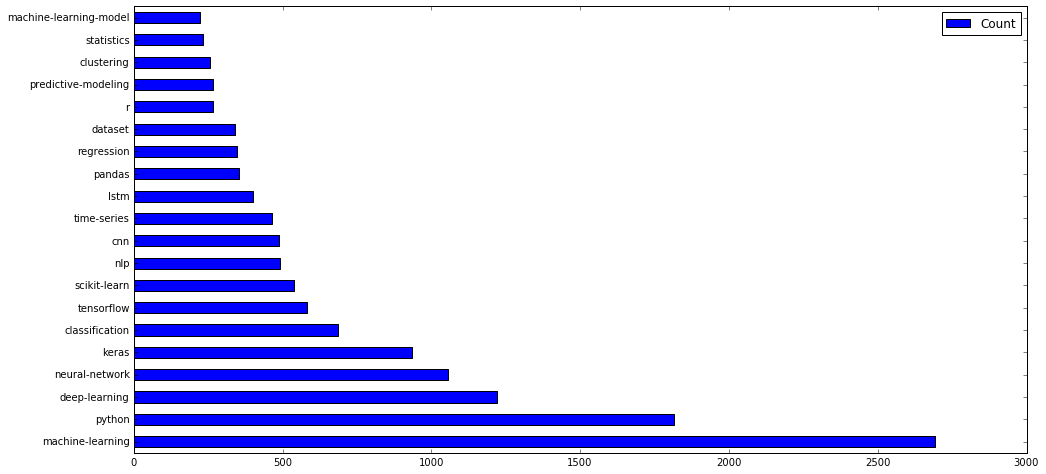

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
most_used.plot(kind = 'barh', figsize = (16,8))


In [11]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
tag_view_count

{'.net': 438,
 '3d-object-detection': 7,
 '3d-reconstruction': 1129,
 'ab-test': 153,
 'accuracy': 15233,
 'activation': 15,
 'activation-function': 13121,
 'active-learning': 155,
 'activity-recognition': 126,
 'actor-critic': 1014,
 'adaboost': 23,
 'aggregation': 828,
 'ai': 3432,
 'alex-net': 208,
 'algorithms': 4581,
 'allennlp': 183,
 'amazon-ml': 35,
 'anaconda': 10476,
 'ann': 74,
 'annotation': 1043,
 'anomaly': 352,
 'anomaly-detection': 10992,
 'anonymization': 381,
 'anova': 70,
 'apache-hadoop': 466,
 'apache-nifi': 119,
 'apache-spark': 4598,
 'arima': 1004,
 'association-rules': 1022,
 'attention-mechanism': 15165,
 'auc': 67,
 'audio-recognition': 2195,
 'autoencoder': 15676,
 'automatic-summarization': 581,
 'automation': 142,
 'automl': 85,
 'aws': 1939,
 'aws-lambda': 992,
 'azure-ml': 694,
 'backpropagation': 9958,
 'batch-normalization': 4913,
 'bayes-error': 128,
 'bayesian': 3171,
 'bayesian-networks': 786,
 'bayesian-nonparametric': 29,
 'beginner': 2281,
 'bert

In [12]:
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient = 'index')
tag_view_count.rename(columns = {0:'ViewCount'}, inplace = True)
tag_view_count.sort_values(by = 'ViewCount', ascending = False, inplace = True)


### Most Viewed

In [13]:
most_viewed = tag_view_count.head(20)
most_viewed

,ViewCount
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


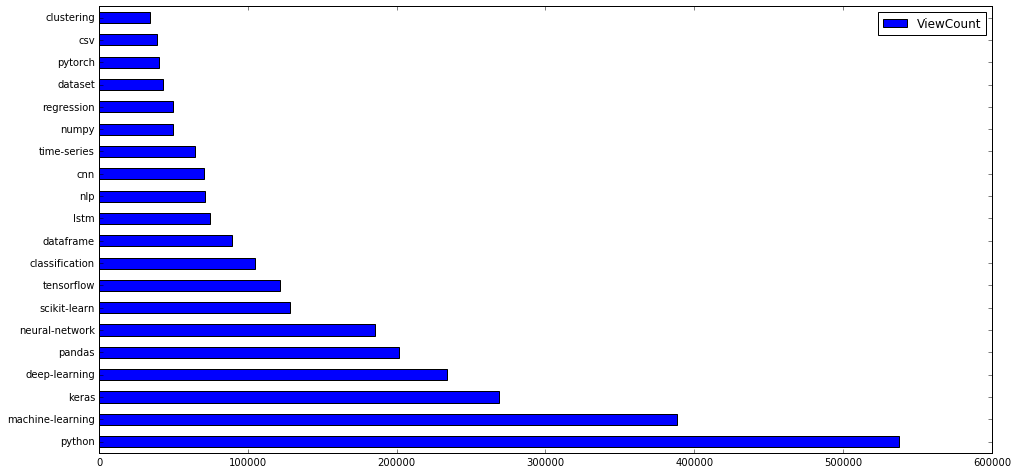

In [14]:
most_viewed.plot(kind = 'barh', figsize = (16,8))